# Decision Trees
#### Math 3480 - Machine Learning - Dr. Michael E. Olson

## Reading
* Geron, Chapter 6
* Brunton, Section 5.8 [Video](https://www.youtube.com/watch?v=fsE9gzbf8Z4)
* James, Chapter 8

## Uses
* Classification

## How it works
Look at each variable in the data. 
* For categorical data, you can separate (or branch) the data into the categories for a variable
* For numerical data, you can create a boundary, and classify the data by whether it is greater than or less than that boundary

Parts of a decision tree
* Node: Split the value of a certain attribute (the variable being tested for a split)
* Edge: Possible outcomes of each node that leads to the next node
* Root: The first node
* Leaves: The final nodes that predict the outcome

## Example
Take the Iris dataset, and create a model to separate the data by category.

We have four primary variables:
* $x_1$: sepal length
* $x_2$: sepal width
* $x_3$: petal length
* $x_4$: petal width

Here is a plot of the data:

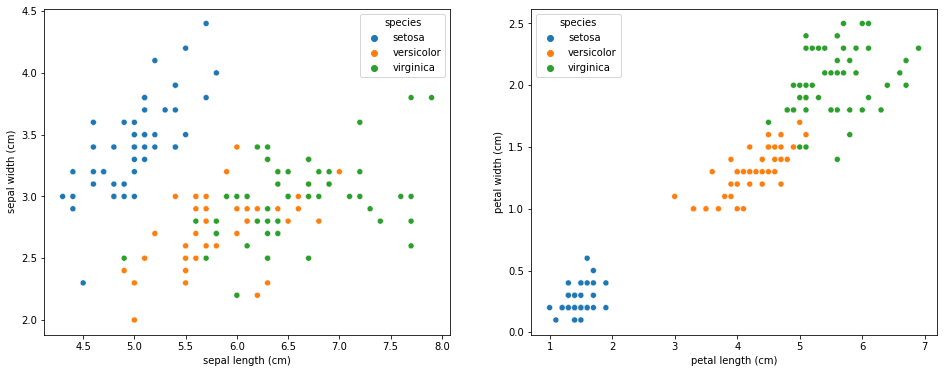

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)
from sklearn import datasets

iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
species = pd.DataFrame(iris_data['target'], columns=['species_num'])

def test_species(x):
    if x==0: return "setosa"
    if x==1: return "versicolor"
    if x==2: return "virginica"

iris['species'] = species['species_num'].apply(lambda x: test_species(x))

fig, ax =plt.subplots(1,2)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species', ax=ax[1])
sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='species', ax=ax[0])
fig.show()

Now, we find the best separation for our first branch. 
* Looking at the sepal width and length, there is no clear vertical line ($x_1$) or horizontal line ($x_2$) that can separate the data. 
* Looking at the petal width and length, there is a very clear separation in the petal length at $x_3=2.5$. 
  * There is also a clear separation in the petal width at $x_4 = 0.75$. 
  * The separation in $x_3$ is wider, so we'll use that as our first classification.

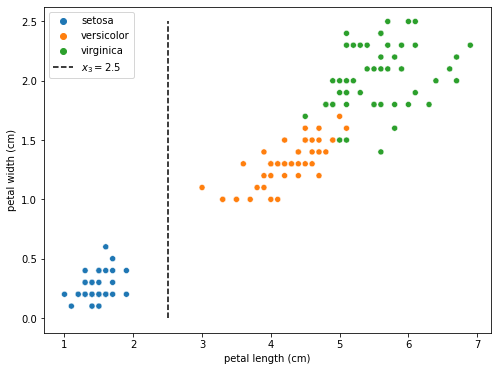

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.legend()

Our second branch will be to separate the Versicolor and Virginica species. The best separation would be a horizontal line around $x_4 = 1.75$.

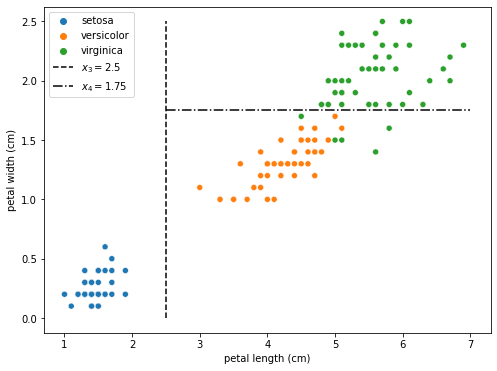

In [3]:
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
plt.legend()

But this wasn't a perfect separation. There are some Virginica results in the Versicolor region.
* Create another separation to best separate the data around $x_3 = 4.95$.

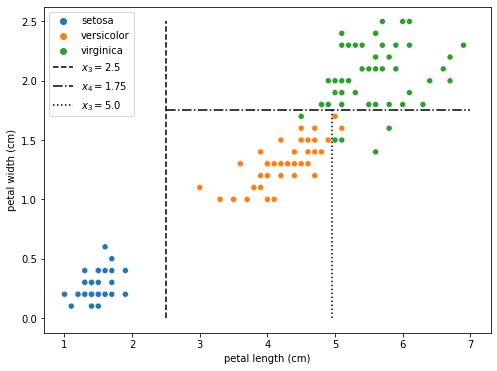

In [4]:
sns.scatterplot(data = iris, x = 'petal length (cm)', y = 'petal width (cm)', hue='species')
plt.plot((2.5,2.5),(0,2.5), color='k', linestyle='--', label='$x_3=2.5$')
plt.plot((2.5,7),(1.75,1.75), color='k', linestyle='-.', label='$x_4=1.75$')
plt.plot((4.95,4.95),(0,1.75), color='k', linestyle=':', label='$x_3=5.0$')
plt.legend()

Even though this isn't perfect, we really only have 3 misclassifications. This creates a pretty good model for the iris flowers.

So, the decision tree would look something like this:

[![](https://mermaid.ink/img/pako:eNpdkMFqwkAQhl9lmLMGlIo0B0FN7EWkVLCUbA5DdposTXZlszmUJO_ejY0QndPA_83HzLSYGckYYm7pWsDxQ2jwtW3f2VEJR9a5K2ADy2DVjxHM5xvovrjuYDdin0reqEWwfsJOpoN9cmZnakr_k91EECcXZXOlVUYpPMTDYPS8xUvwevdHE8thYnlIB8lbcmFbq8yUxqY4w4ptRUr6k9uBFegKrlhg6FtJ9keg0L3nmqskx7FUzlgMv6mseYbUOHP-1RmGzjZ8hyJF_n3VSPV_HExqUw)](https://mermaid-js.github.io/mermaid-live-editor/edit#pako:eNpdkMFqwkAQhl9lmLMGlIo0B0FN7EWkVLCUbA5DdposTXZlszmUJO_ejY0QndPA_83HzLSYGckYYm7pWsDxQ2jwtW3f2VEJR9a5K2ADy2DVjxHM5xvovrjuYDdin0reqEWwfsJOpoN9cmZnakr_k91EECcXZXOlVUYpPMTDYPS8xUvwevdHE8thYnlIB8lbcmFbq8yUxqY4w4ptRUr6k9uBFegKrlhg6FtJ9keg0L3nmqskx7FUzlgMv6mseYbUOHP-1RmGzjZ8hyJF_n3VSPV_HExqUw)

## Where do we make the split?
How do we know which split to look at first?
* Gini Index
* Entropy
* Information Gain

### Gini Index
To calculate the Gini index, take each node ($i$) and the number classified in that note ($n_i$). Then count the number of instances ($n_k$) in each category $k$. The ratio of the number of each classification to the number of elements in that node is $p_{i,k} = \frac{n_k}{n_i}$ The Gini index is calculated as,
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2 \qquad \qquad p_{i,k} = \frac{n_k}{n_i}$$

Take the second split. How many points have a petal width $<1.75$ (below the second split)?

In [23]:
iris_below2 = iris[(iris['petal width (cm)'] < 1.75) & (iris['petal length (cm)'] > 2.5)]
iris_below2['species'].value_counts()

versicolor    49
virginica      5
Name: species, dtype: int64

Let's find the Gini impurity of this split:

In [25]:
G = 1 - (0/54)**2 - (49/54)**2 - (5/54)**2
G

0.1680384087791495

The computer tries different splits and finds the lowest Gini impurity.

To calculate the best split, `scikit-learn` uses the *CART* algorithm (Classification And Regression Tree), which only produces two branches from each node. Other algorithms such as *ID3* can produce more algorithms. The cost function for the *CART* algorithm is:
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

where $m_{left/right}$ is the number of instances in the left/right subset and $G_{left/right}$ is the Gini impurity of the left/right subset.

Unfortunately, the *CART* algorithm can be rather greedy. The number of calculations is $\mathcal{O}(exp(m))$. On the other hand, the decision tree itself only takes $\mathcal{O}(\log_2(m))$ calculations and is independent of the number of features checked. So, another option is a check that is on that same order, such as *entropy*.

### Entropy
Applying the entropy to the decision tree,
$$H_i = -\sum_{k=1}^n p_{i,k} \log_2(p_{i,k})$$

Calculate the entropy below the second split.

In [27]:
import numpy as np
H = -(49/54)*np.log2(49/54) - (5/54)*np.log2(5/54)
H

0.44506485705083865

As before, the computer tries different splits and finds the lowest entropy.

Which method is better at finding best split? In most cases, it won't really matter.
* Gini is faster to compute
* When there is a difference, Gini tends to isolate the most frequent class in its own branch of the tree
* When there is a difference, Entropy tends to produce slightly more balanced trees

## Regression
Decision Trees can also be used for regression. The biggest difference is that the decision tree returns a value instead of a category. The accuracy of the regression depends on the __depth__, or number of branches you want to make.
* Find an x value that separates the data into two groups 
  * Find the best value to minimize the error (MSE, etc.)
  * Return the mean of the y values in each group
* Find two more x values that separate each of the two groups into two smaller groups
* Keep going as many steps as you want, specifying the depth

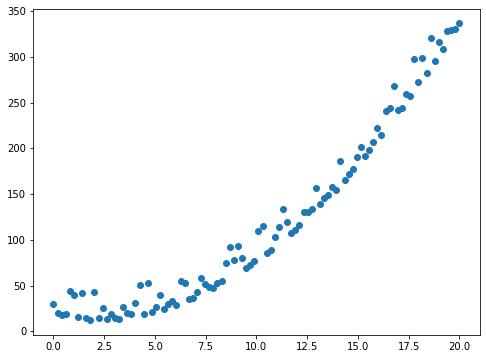

In [55]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0,20,100)
y = X**2 - 4*X + 15.3 + 40**np.random.random(len(X))

plt.scatter(X,y)

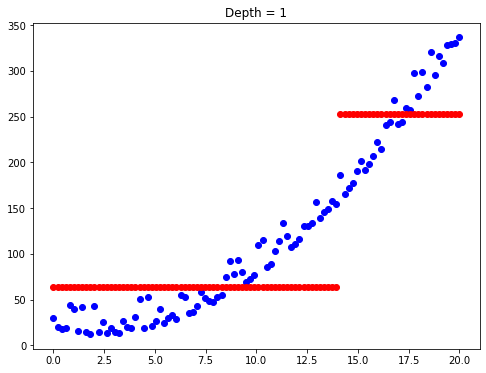

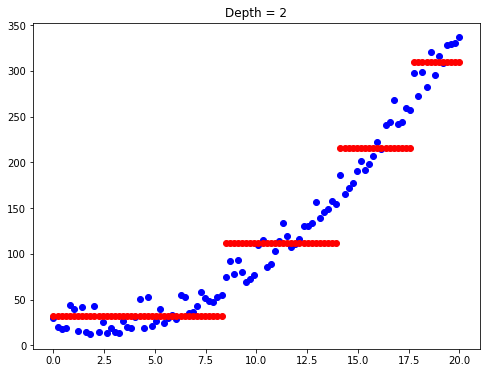

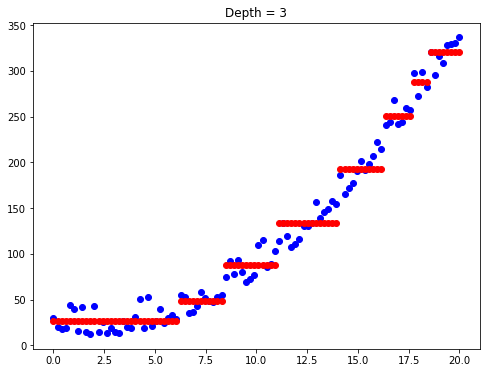

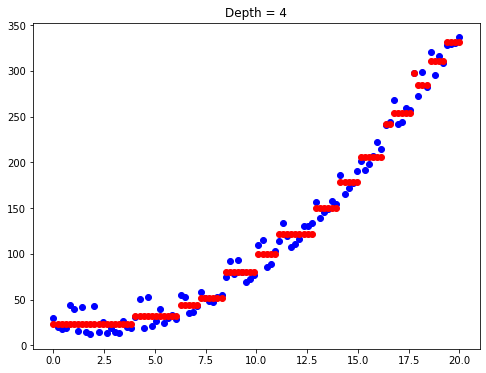

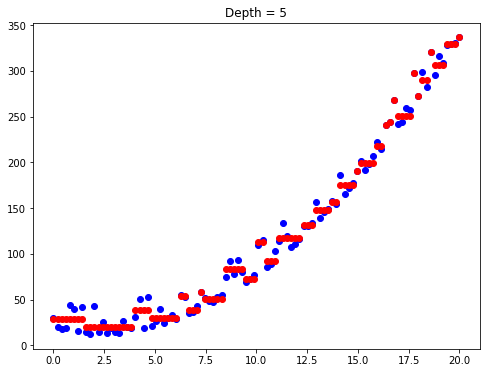

In [60]:
from sklearn.tree import DecisionTreeRegressor

XT = np.transpose([X])

for i in range(5):
    plt.figure()
    tree_reg = DecisionTreeRegressor(max_depth=i+1)
    tree_reg.fit(XT,y)
    y_predict = tree_reg.predict(XT)
    plt.scatter(X,y,color='b',label='original')
    plt.scatter(X,y_predict, color='r')
    plt.title('Depth = {0}'.format(i+1))

Notice how with $Depth=5$, the regression points start to __overfit__ the data. To fix this, we can use the ```min_samples_leaf``` option. From the documentation:
> The minimum number of samples required to be at a leaf node.
    *A split point at any depth will only be considered if it leaves at
    least ```min_samples_leaf``` training samples in each of the left and
    right branches.*  This may have the effect of smoothing the model,
    especially in regression.


Text(0.5, 1.0, 'Depth = 5')

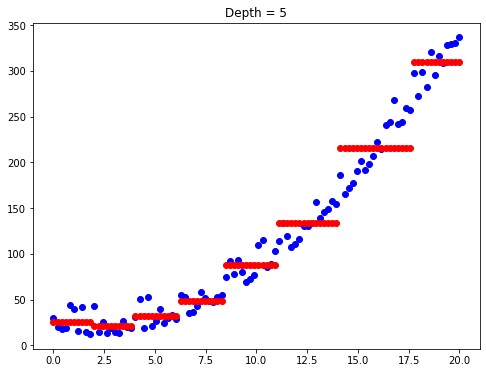

In [61]:
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
tree_reg.fit(XT,y)
y_predict = tree_reg.predict(XT)
plt.scatter(X,y,color='b',label='original')
plt.scatter(X,y_predict, color='r')
plt.title('Depth = 5')